In [11]:
print('>> Installing Libraries')

!pip3 install pandas matplotlib numpy scikit-surprise

print('>> Libraries Installed')

>> Installing Libraries
>> Libraries Installed


In [12]:
print('>> Importing Libraries')

import pandas as pd

from surprise import Reader, Dataset, SVD

from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

print('>> Libraries imported')

>> Importing Libraries
>> Libraries imported


In [13]:
df = pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
df.drop('timestamp', axis=1, inplace = True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [15]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [16]:
n_movies = df["movieId"].nunique()
n_users = df["userId"].nunique()
print(f'Number of unique movies: {n_movies}')
print(f'Number of unique users: {n_users}')

Number of unique movies: 9724
Number of unique users: 610


In [17]:
available_ratings = df['rating'].count()
total_ratings = n_movies*n_users
missing_ratings = total_ratings - available_ratings
sparsity = (missing_ratings/total_ratings)*100
print(f'sparsity: {sparsity}')

sparsity: 98.30003169443864


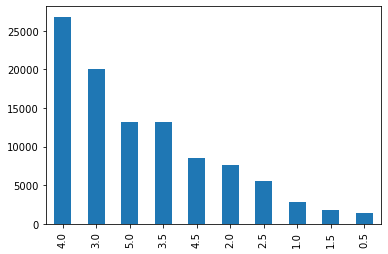

In [18]:
df['rating'].value_counts().plot(kind = 'bar')

In [19]:
filter_movies = df['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()

In [20]:
filter_users = df['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()

In [21]:
print(f'Original Shape: {df.shape}')
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print(f'New shape: {df.shape}')

Original Shape: (100836, 3)
New shape: (92394, 3)


In [22]:
cols = ['userId', 'movieId', 'rating']

In [23]:
reader = Reader(rating_scale = (0.5, 5))
data = Dataset.load_from_df(df[cols],reader)

In [24]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

In [25]:
algo = SVD(n_epochs = 25, verbose = True)


In [26]:
cross_validate(algo, data, measures = ['RMSE','MAE'], cv=5, verbose = True)
print('>> Training Done')

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

In [40]:
predictions = algo.test(antiset)

In [38]:
predictions[0]

Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False})

In [39]:
from collections import defaultdict
def get_top_n(predictions, n):
    top_n = defaultdict(list)
    for uid, iid, _, est, _ in predictions:
        top_n[uid].append((iid, est))
        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
    return top_n
    pass
top_n = get_top_n(predictions, n=3)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 48516, 68157]
2 [1197, 527, 4973]
3 [1221, 4967, 5618]
4 [1035, 246, 1272]
5 [750, 1233, 1197]
6 [910, 1197, 1230]
7 [1250, 2716, 1217]
8 [745, 1270, 6440]
9 [750, 2324, 2329]
10 [8368, 1292, 7361]
11 [1270, 527, 6787]
12 [47, 50, 296]
13 [1210, 318, 933]
14 [750, 158966, 951]
15 [4011, 4973, 1228]
16 [44555, 1215, 3435]
17 [3275, 778, 246]
18 [912, 750, 1217]
19 [318, 31658, 1212]
20 [1270, 260, 1246]
21 [3266, 933, 1172]
22 [1233, 750, 1732]
23 [63082, 318, 142488]
24 [1221, 912, 3266]
25 [1210, 318, 7361]
26 [2959, 1197, 1276]
27 [58559, 2324, 5690]
28 [750, 1223, 142488]
29 [933, 527, 912]
30 [50, 608, 1089]
31 [951, 1219, 1248]
32 [1193, 1252, 750]
33 [750, 2858, 1089]
34 [260, 1196, 750]
35 [899, 933, 750]
36 [912, 1233, 1230]
37 [1233, 1136, 168252]
38 [260, 541, 2959]
39 [8874, 1233, 7361]
40 [527, 47, 1196]
41 [912, 4741, 1283]
42 [750, 215, 778]
43 [50, 223, 260]
44 [912, 4973, 527]
45 [7153, 1201, 5952]
46 [1217, 912, 1136]
47 [1204, 2318, 3468]
48 [2959, 28, 904]
49